In [143]:
import pandas as pd
import pandoc as pdc
import matplotlib.pyplot as plt

In [53]:
# Step 1: Read the dataset into a pandas DataFrame
data = pd.read_csv("./10yearAUSOpenMatches.csv")

The visualization showcases the top 10 players with the highest number of aces in tennis matches. Aces are powerful serves that are not touched by the opponent, earning the serving player a point.
The horizontal bar plot highlights the number of aces achieved by each player, with the y-axis representing the player's name and the x-axis representing the number of aces. The bars are color-coded in a pleasant steel blue hue.
By examining this visualization, we can identify the players who excel in delivering aces during matches. The taller the bar, the greater the number of aces the player has achieved. This information provides insights into the serving prowess and effectiveness of players in winning crucial points.
The visualization not only allows for a quick comparison of the top players but also emphasizes the importance of aces as a dominating factor in the game. It serves as a visual representation of the players' skill and provides a snapshot of their proficiency in serving aces.
This visualization aims to inspire further analysis and discussion about the significance of aces in tennis and the notable players who have mastered this aspect of the game.

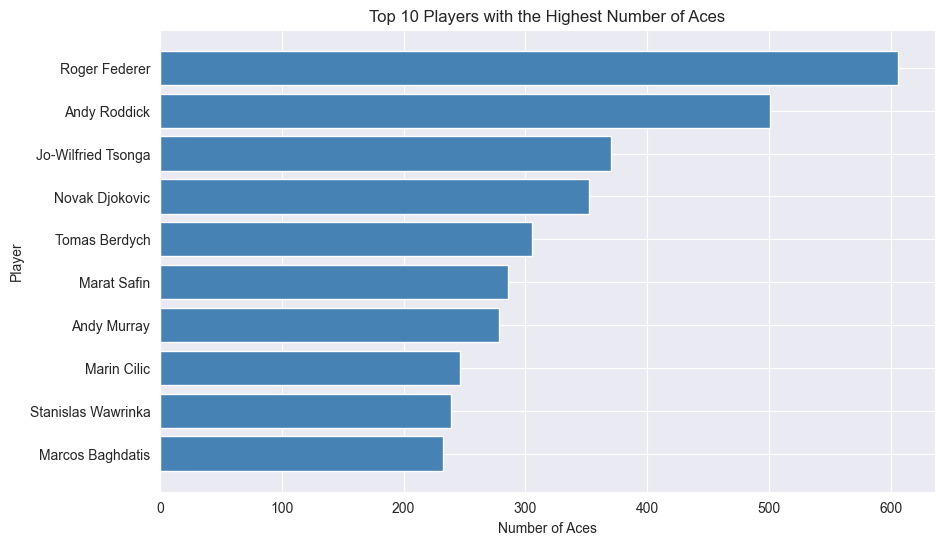

In [137]:
df_grouped = data.groupby(["player1", "country1"]).sum().reset_index()
df_sorted = df_grouped.sort_values("ace1", ascending=False).reset_index(drop=True)
df_top10 = df_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(df_top10["player1"], df_top10["ace1"], color="steelblue")

plt.xlabel("Number of Aces")
plt.ylabel("Player")
plt.title("Top 10 Players with the Highest Number of Aces")

plt.gca().invert_yaxis()

plt.show()

Story: "Global Tennis Rivalries: Battle of Nations"

In this visualization, we explore the rivalry between different countries in tennis by analyzing the matchups between players from different nations and their performance in Grand Slam tournaments.
Using the given dataset, we extract the necessary information such as the round, winner, results, year, player names, and countries. We focus on the matches where players from different countries compete against each other.
To visualize this story, we create a bar chart where each bar represents a country. The height of each bar represents the number of victories achieved by players from that country in matchups against players from other nations. By comparing the heights of the bars, we can identify the countries with the highest number of victories and the intensity of their rivalries.
The visualization highlights the intense competition and national pride in tennis, showcasing the rivalries between countries. It offers a unique perspective on the sport, allowing users to explore the dynamics of these rivalries, the dominance of certain nations, and the impact of players on their country's success.

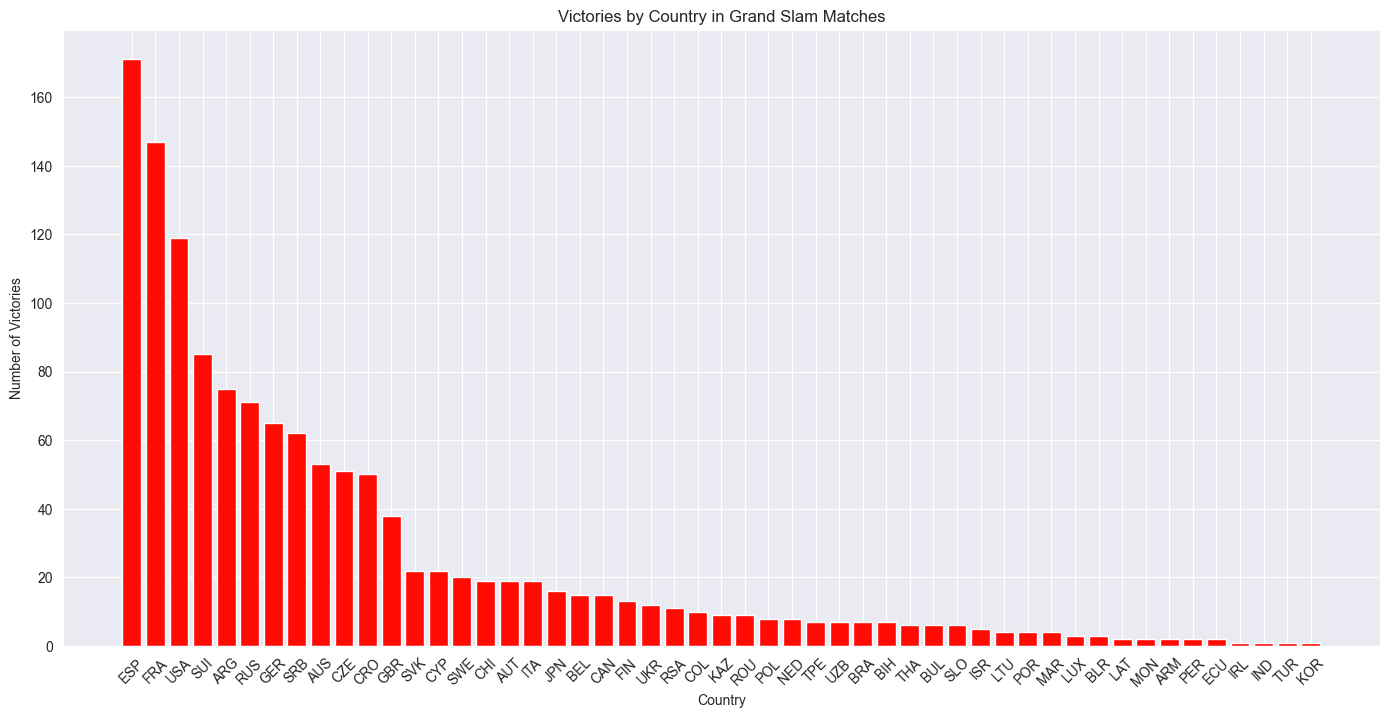

In [136]:
# Filter the data for matches between players from different countries
matches = data[data["country1"] != data["country2"]]

# Count victories by country
victories_by_country = matches["country1"].value_counts()

# Create the bar chart
plt.figure(figsize=(17, 8))

plt.bar(victories_by_country.index, victories_by_country.values)
plt.title("Victories by Country in Grand Slam Matches")
plt.xlabel("Country")
plt.ylabel("Number of Victories")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Story: "Grand Slam Showdown: Analyzing Winning Streaks"

In this visualization, we explore the winning streaks of tennis players in Grand Slam tournaments. We aim to identify the players with the longest winning streaks and analyze their performance during these remarkable periods.
Using the given dataset, we extract the necessary information such as the round, winner, results, year, player names, and countries. We then analyze the data to determine the consecutive wins for each player in the Grand Slam tournaments.
To visualize this story, we create a line chart where the x-axis represents the years and the y-axis represents the number of consecutive wins. Each player's line showcases their winning streaks over time. By examining the chart, we can identify the players who had the most extended periods of dominance and their respective years of triumph.
The visualization serves as a testament to the exceptional talent and competitive spirit displayed by these players throughout their careers. It offers a compelling narrative of the evolution of winning streaks in Grand Slam tournaments and provides insights into the players' resilience, consistency, and ability to excel in high-pressure situations.

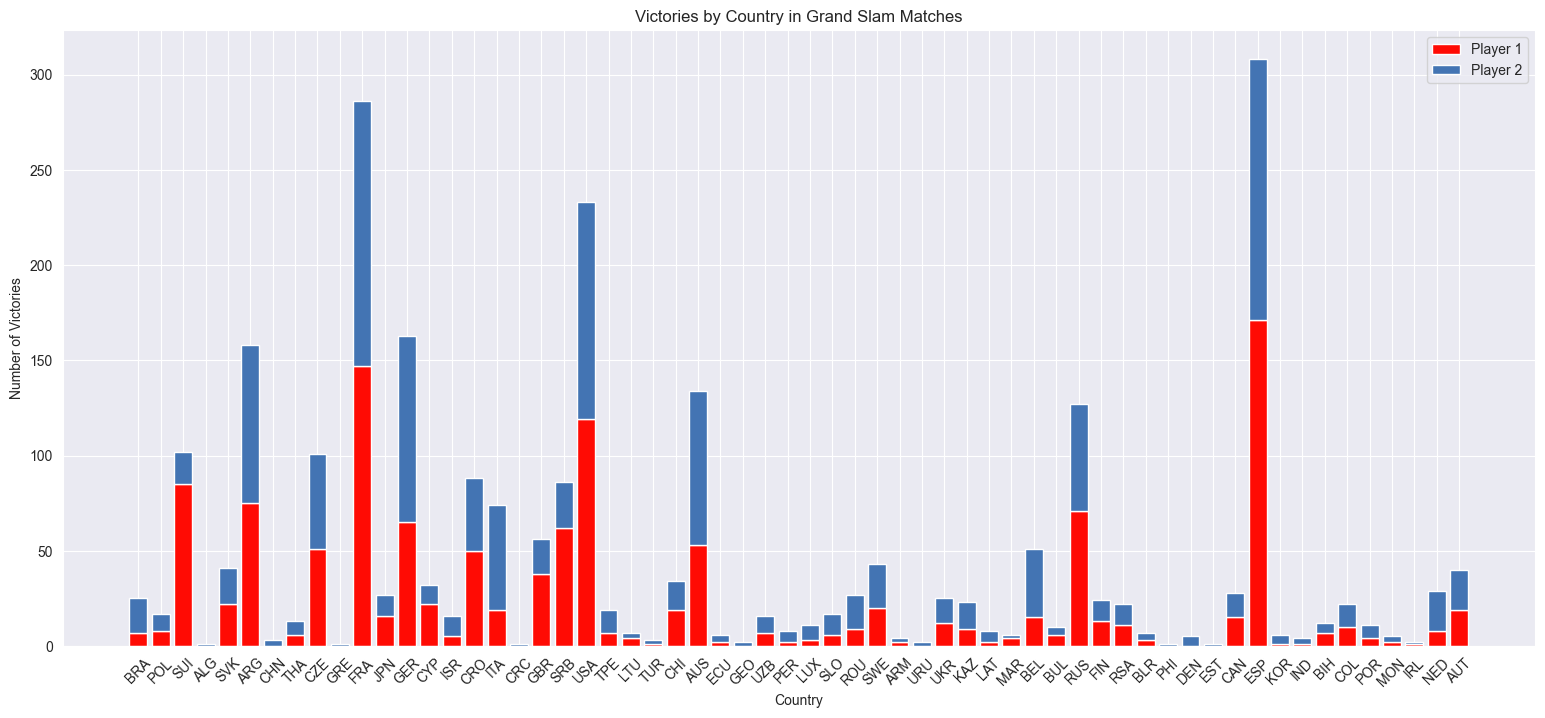

In [141]:
matches = data[data["country1"] != data["country2"]]

# Count victories by country for player 1 and player 2
victories_player1 = matches["country1"].value_counts()
victories_player2 = matches["country2"].value_counts()

# Get unique countries from both player1 and player2 victories
countries = set(victories_player1.index).union(set(victories_player2.index))

# Create a DataFrame with country-wise victories for player 1 and player 2
victories_df = pd.DataFrame({
    "Country": list(countries),
    "Player 1 Victories": [victories_player1.get(country, 0) for country in countries],
    "Player 2 Victories": [victories_player2.get(country, 0) for country in countries]
})

# Create the stacked bar chart
plt.figure(figsize=(19, 8))

plt.bar(victories_df["Country"], victories_df["Player 1 Victories"], label="Player 1")
plt.bar(victories_df["Country"], victories_df["Player 2 Victories"], bottom=victories_df["Player 1 Victories"], label="Player 2")

plt.title("Victories by Country in Grand Slam Matches")
plt.xlabel("Country")
plt.ylabel("Number of Victories")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()